In [ ]:
# pseudocode 
# import dependecies
#intialize counters
# create list for weather data
# loop list
# group cities in sets of 50 to track progress 
# build url endpoint for each city
# log url and the record and set numbers
# make api request for each city
# parse json data for city, country, date, lat/lng, max temp, humidity, cloudiness, wind speed
# add ths data to a list in dictionary format and convert into DF

In [1]:
# import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create random lat and longs
lats = np.random.uniform(-90.000 , 90.000 , size = 1500)
longs = np.random.uniform(-180.000 , 180.000 , size = 1500)
lat_longs = zip(lats, longs)
lat_longs

In [4]:
# add the lat long to a list
coordinates = list(lat_longs)

In [5]:
# create a list for the cities 
cities = []
# ID nearest city for eact lat/long
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if its not on the list add it 
    if city not in cities:
        cities.append(city)
# print lengt to confrim count
len(cities)


610

In [6]:
# create list for the weather data
city_data = []

# print beggining of logging
print("Beginning Data Retrieval")
print("---------------------------")

# create counters
record_count = 1 
set_count = 1 

# loop through cities
for i, city in enumerate(cities):
    #group by sets of 50 for logging
    if( i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1
    # create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log URL record and set numbers for city
    print(f"Processing Record {record_count} to Set {set_count} | {city}")
    
    # add to record count
    record_count += 1
    
# run API request for each city
    try:
        # Parse json to retrieve data
        city_weather = requests.get(city_url).json()
        # Parse the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert date to ISO format 
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%H:%S')
        # append the city info into city_data 
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # if an error occurs, skip the city 
    except:
        print("City not found. Skipping...")
        pass
# indicate data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 to Set 1 | guantanamo
Processing Record 2 to Set 1 | waitati
Processing Record 3 to Set 1 | chuy
Processing Record 4 to Set 1 | qaanaaq
Processing Record 5 to Set 1 | lata
Processing Record 6 to Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 to Set 1 | salt
Processing Record 8 to Set 1 | cape town
Processing Record 9 to Set 1 | ushuaia
Processing Record 10 to Set 1 | busselton
Processing Record 11 to Set 1 | bengkulu
Processing Record 12 to Set 1 | utica
Processing Record 13 to Set 1 | vaini
Processing Record 14 to Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 to Set 1 | cayenne
Processing Record 16 to Set 1 | katsuura
Processing Record 17 to Set 1 | albany
Processing Record 18 to Set 1 | upernavik
Processing Record 19 to Set 1 | tuatapere
Processing Record 20 to Set 1 | tasiilaq
Processing Record 21 to Set 1 | la ronge
Processing Record 22 to Set 1 | batagay-alyta
Pr

Processing Record 36 to Set 4 | umzimvubu
City not found. Skipping...
Processing Record 37 to Set 4 | aosta
Processing Record 38 to Set 4 | airai
Processing Record 39 to Set 4 | gigmoto
Processing Record 40 to Set 4 | sao filipe
Processing Record 41 to Set 4 | hobyo
Processing Record 42 to Set 4 | clyde river
Processing Record 43 to Set 4 | egvekinot
Processing Record 44 to Set 4 | lolua
City not found. Skipping...
Processing Record 45 to Set 4 | sambava
Processing Record 46 to Set 4 | esil
Processing Record 47 to Set 4 | ossora
Processing Record 48 to Set 4 | mecca
Processing Record 49 to Set 4 | lanzhou
Processing Record 50 to Set 4 | tabiauea
City not found. Skipping...
Processing Record 1 to Set 5 | vardo
Processing Record 2 to Set 5 | port-gentil
Processing Record 3 to Set 5 | carndonagh
Processing Record 4 to Set 5 | saint marys
Processing Record 5 to Set 5 | dikson
Processing Record 6 to Set 5 | imeni poliny osipenko
Processing Record 7 to Set 5 | fortuna
Processing Record 8 to 

Processing Record 22 to Set 8 | istanbul
Processing Record 23 to Set 8 | luanda
Processing Record 24 to Set 8 | sainte-maxime
Processing Record 25 to Set 8 | nara
Processing Record 26 to Set 8 | namibe
Processing Record 27 to Set 8 | hokitika
Processing Record 28 to Set 8 | lodwar
Processing Record 29 to Set 8 | namatanai
Processing Record 30 to Set 8 | mahina
Processing Record 31 to Set 8 | nelson bay
Processing Record 32 to Set 8 | ibra
Processing Record 33 to Set 8 | gravdal
Processing Record 34 to Set 8 | san andres
Processing Record 35 to Set 8 | bani walid
Processing Record 36 to Set 8 | toropets
Processing Record 37 to Set 8 | sechura
Processing Record 38 to Set 8 | utiroa
City not found. Skipping...
Processing Record 39 to Set 8 | chumikan
Processing Record 40 to Set 8 | humaita
Processing Record 41 to Set 8 | karaul
City not found. Skipping...
Processing Record 42 to Set 8 | vaitape
Processing Record 43 to Set 8 | buala
Processing Record 44 to Set 8 | rundu
Processing Record 4

Processing Record 11 to Set 12 | almeirim
Processing Record 12 to Set 12 | waddan
Processing Record 13 to Set 12 | yaan
Processing Record 14 to Set 12 | bad salzungen
Processing Record 15 to Set 12 | iqaluit
Processing Record 16 to Set 12 | praia da vitoria
Processing Record 17 to Set 12 | acajutla
Processing Record 18 to Set 12 | ilulissat
Processing Record 19 to Set 12 | auray
Processing Record 20 to Set 12 | erzin
Processing Record 21 to Set 12 | gobabis
Processing Record 22 to Set 12 | nhulunbuy
Processing Record 23 to Set 12 | coquimbo
Processing Record 24 to Set 12 | atbasar
Processing Record 25 to Set 12 | atambua
Processing Record 26 to Set 12 | sakakah
Processing Record 27 to Set 12 | tura
Processing Record 28 to Set 12 | piacabucu
Processing Record 29 to Set 12 | banda aceh
Processing Record 30 to Set 12 | muros
Processing Record 31 to Set 12 | san angelo
Processing Record 32 to Set 12 | gold coast
Processing Record 33 to Set 12 | liwale
Processing Record 34 to Set 12 | dawla

In [24]:
len(city_data)


556

NameError: name 'Cloudiness' is not defined

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guantanamo,20.1444,-75.2092,87.87,55,20,6.31,CU,2021-05-25 15:15:33
1,Waitati,-45.7500,170.5667,37.80,73,100,2.93,NZ,2021-05-25 15:15:34
2,Chuy,-33.6971,-53.4616,62.10,54,0,17.96,UY,2021-05-25 14:14:03
3,Qaanaaq,77.4840,-69.3632,31.28,69,0,7.07,GL,2021-05-25 14:14:01
4,Lata,40.1629,-8.3327,83.71,45,48,8.30,PT,2021-05-25 15:15:18
5,Salt,32.0392,35.7272,84.76,27,0,14.85,JO,2021-05-25 15:15:34
6,Cape Town,-33.9258,18.4232,67.08,63,40,1.99,ZA,2021-05-25 14:14:36
7,Ushuaia,-54.8000,-68.3000,31.62,80,75,19.57,AR,2021-05-25 14:14:57
8,Busselton,-33.6500,115.3333,50.04,72,59,5.73,AU,2021-05-25 14:14:13
9,Bengkulu,-3.8004,102.2655,79.72,87,100,5.08,ID,2021-05-25 14:14:55


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guantanamo,CU,2021-05-25 15:15:33,20.1444,-75.2092,87.87,55,20,6.31
1,Waitati,NZ,2021-05-25 15:15:34,-45.7500,170.5667,37.80,73,100,2.93
2,Chuy,UY,2021-05-25 14:14:03,-33.6971,-53.4616,62.10,54,0,17.96
3,Qaanaaq,GL,2021-05-25 14:14:01,77.4840,-69.3632,31.28,69,0,7.07
4,Lata,PT,2021-05-25 15:15:18,40.1629,-8.3327,83.71,45,48,8.30
5,Salt,JO,2021-05-25 15:15:34,32.0392,35.7272,84.76,27,0,14.85
6,Cape Town,ZA,2021-05-25 14:14:36,-33.9258,18.4232,67.08,63,40,1.99
7,Ushuaia,AR,2021-05-25 14:14:57,-54.8000,-68.3000,31.62,80,75,19.57
8,Busselton,AU,2021-05-25 14:14:13,-33.6500,115.3333,50.04,72,59,5.73
9,Bengkulu,ID,2021-05-25 14:14:55,-3.8004,102.2655,79.72,87,100,5.08


In [11]:
# create output file
output_data_file = "weather_data/cities.csv"

# export to csv
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [30]:
# extract relevant field from df for plotting 
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
len(wind_speed)

556

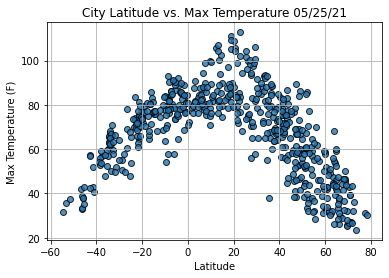

In [13]:
# import time module 
import time

# make scatter plot for lat vs max temp
plt.scatter( lats,
             max_temp,
             edgecolor = "black", linewidths = 1, marker = "o",
             alpha = 0.8, label ="Cities"
            )
# add other grpah properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid("True")

# save figure
plt.savefig("weather_data/Fig1.png")

#show
plt.show()

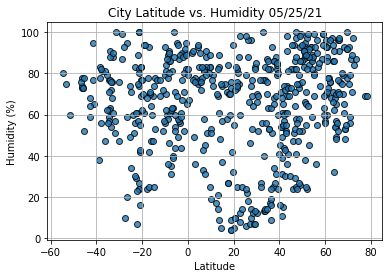

In [14]:
# make scatter plot for lat vs humidity
plt.scatter( lats,
             humidity,
             edgecolor = "black", linewidths = 1, marker = "o",
             alpha = 0.8, label ="Cities"
            )
# add other grpah properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid("True")

# save figure
plt.savefig("weather_data/Fig2.png")

#show
plt.show()

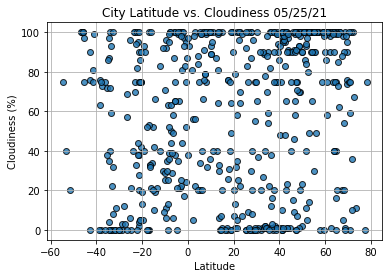

In [32]:
# make scatter plot for lat vs cloudiness
plt.scatter( lats,
             cloudiness,
             edgecolor = "black", linewidths = 1, marker = "o",
             alpha = 0.8, label ="Cities"
           )
# add other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid("True")

# save figure
plt.savefig("weather_data/Fig3.png")

#show
plt.show()

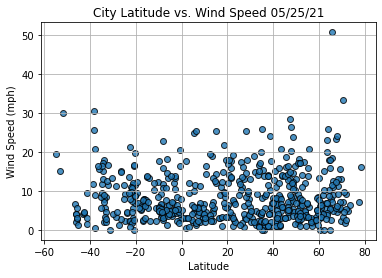

In [33]:
# make scatter plot for lat vs wind speed
plt.scatter( lats,
             wind_speed,
             edgecolor = "black", linewidths = 1, marker = "o",
             alpha = 0.8, label ="Cities"
           )
# add other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid("True")

# save figure
plt.savefig("weather_data/Fig4.png")

#show
plt.show()

In [52]:
# import lineregress
from scipy.stats import linregress

#create a function to perform linear regression on weather data 
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # create scatter plot and regression
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color ="red")
    plt.xlabel('Latitide')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
# to filter hemisphere, check Lat relationship to 0 and put results into new df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0 )] 
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0  )]

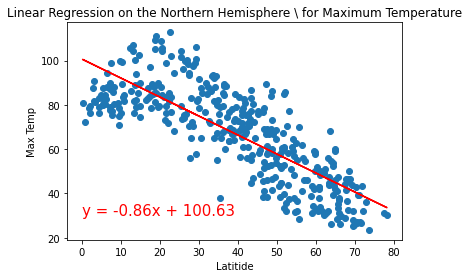

In [54]:
# lineregress for northern hemi temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature',
                       'Max Temp',
                       (0,30)
                      )

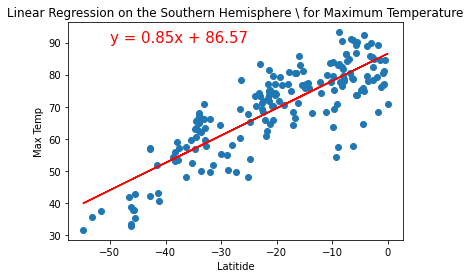

In [55]:
# lineregress for sountehrn hemi temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Maximum Temperature',
                       'Max Temp',
                       (-50,90)
                      )

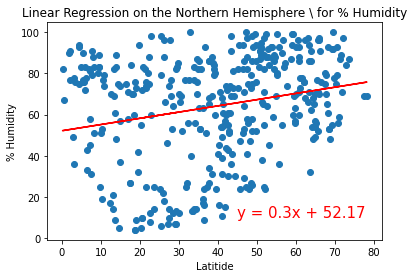

In [60]:
# lineregress for northern hemi humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Humidity',
                       '% Humidity',
                       (45,10)
                      )

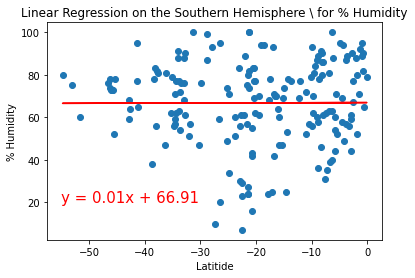

In [62]:
# lineregress for southern hemi humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Humidity',
                       '% Humidity',
                       (-55,20)
                      )

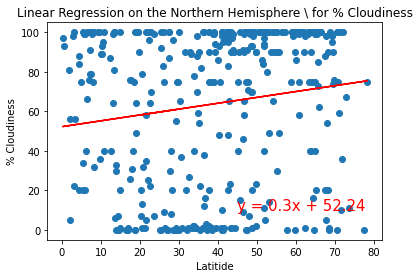

In [63]:
# lineregress for northern hemi cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Cloudiness',
                       '% Cloudiness',
                       (45,10)
                      )

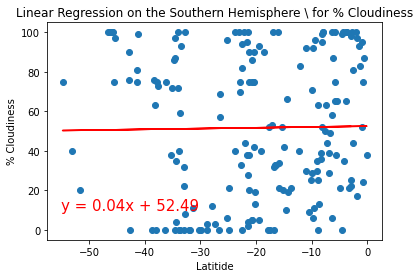

In [66]:
# lineregress for southern hemi cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Cloudiness',
                       '% Cloudiness',
                       (-55,10)
                      )

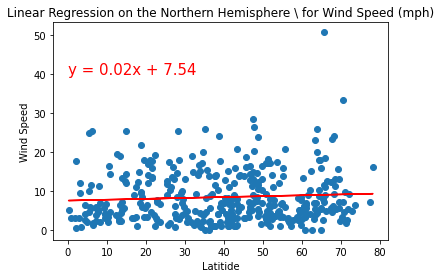

In [69]:
# lineregress for northern hemi wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Wind Speed (mph)',
                       'Wind Speed',
                       (0,40)
                      )

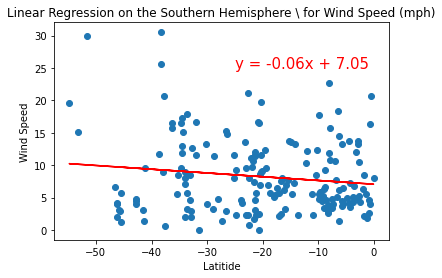

In [72]:
# lineregress for southern hemi wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Wind Speed (mph)',
                       'Wind Speed',
                       (-25,25)
                      )